# EDA 1  Title: Bike Details Dataset 

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Q1 What is the range of selling prices in the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the dataset (replace 'file_path' with the actual path to your dataset)
bike_data = pd.read_csv("BIKE DETAILS.csv")

# Calculate the minimum and maximum selling prices
min_price = bike_data['selling_price'].min()
max_price = bike_data['selling_price'].max()

# Print the range
print(f"The range of selling prices is from ₹{min_price} to ₹{max_price}.")


The range of selling prices is from ₹5000 to ₹760000.


Q2 What is the median selling price for bikes in the dataset

In [66]:
# Calculate the median selling price for bikes
median_selling_price = bike_data['selling_price'].median()
median_selling_price


45000.0

Q3 What is the most common seller type

In [6]:
# Find the most common seller type
most_common_seller_type = bike_data['seller_type'].mode()[0]
most_common_seller_type




'Individual'

Q4 How many bikes have driven more than 50,000 kilometers

In [68]:
# Import pandas library
import pandas as pd

# Load the dataset
bike_data = pd.read_csv("BIKE DETAILS.csv")

# Filter bikes with km_driven greater than 50,000 and count them
bikes_above_50000 = bike_data[bike_data['km_driven'] > 50000].shape[0]

# Display the result
print(f"The number of bikes that have driven more than 50,000 kilometers is: {bikes_above_50000}")


The number of bikes that have driven more than 50,000 kilometers is: 170


Q5 What is the average km_driven value for each ownership type

In [69]:
# Group by ownership type and calculate the average km_driven
average_km_by_owner = bike_data.groupby('owner')['km_driven'].mean()

# Display the result
print(average_km_by_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


Q6 What proportion of bikes are from the year 2015 or older ?

In [70]:
# Calculate the total number of bikes
total_bikes = bike_data.shape[0]

# Count bikes from the year 2015 or older
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]

# Calculate the proportion
proportion_2015_or_older = bikes_2015_or_older / total_bikes

# Display the result
print(f"The proportion of bikes from the year 2015 or older is: {proportion_2015_or_older:.2%}")


The proportion of bikes from the year 2015 or older is: 56.64%


Q7 What is the trend of missing values across the dataset

In [71]:
# Check for missing values in each column
missing_values = bike_data.isnull().sum()

# Display the missing values trend
print("Trend of missing values across the dataset:")
print(missing_values)


Trend of missing values across the dataset:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Q 8 What is the highest ex_showroom_price recorded, and for which bike


In [72]:
# Find the highest ex_showroom_price and the corresponding bike name
highest_price = bike_data['ex_showroom_price'].max()
bike_with_highest_price = bike_data.loc[bike_data['ex_showroom_price'] == highest_price, 'name'].values[0]

# Display the result
print(f"The highest ex_showroom_price is ₹{highest_price}, recorded for the bike: {bike_with_highest_price}.")


The highest ex_showroom_price is ₹1278000.0, recorded for the bike: Harley-Davidson Street Bob.


Q9 What is the total number of bikes listed by each seller type

In [73]:
# Count the total number of bikes listed by each seller type
bikes_by_seller_type = bike_data['seller_type'].value_counts()

# Display the result
print("Total number of bikes listed by each seller type:")
print(bikes_by_seller_type)


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Q10 What is the relationship between selling_price and km_driven for first-owner bikes

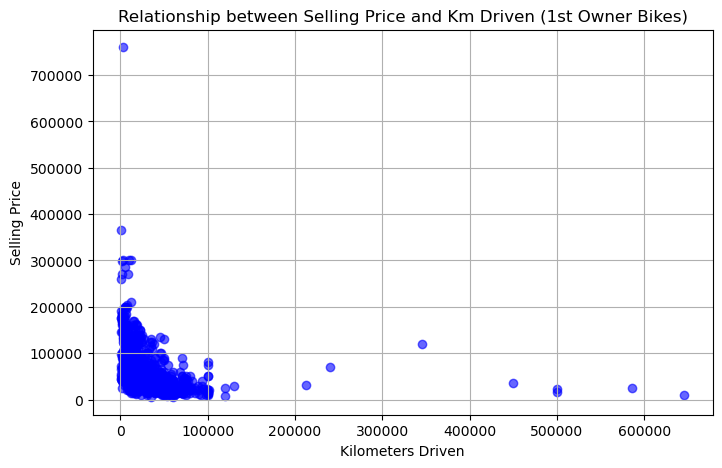

In [74]:
# Filter data for first-owner bikes
first_owner_bikes = bike_data[bike_data['owner'] == '1st owner']

# Plot the relationship between selling_price and km_driven for first-owner bikes
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'], alpha=0.6, color='blue')
plt.title('Relationship between Selling Price and Km Driven (1st Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


Q11  Identify and remove outliers in the km_driven column using the IQR method

In [75]:
# Calculate the IQR for the km_driven column
Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = bike_data[(bike_data['km_driven'] < lower_bound) | (bike_data['km_driven'] > upper_bound)]
print(f"Number of outliers in km_driven: {outliers.shape[0]}")

# Remove outliers
bike_data_no_outliers = bike_data[(bike_data['km_driven'] >= lower_bound) & (bike_data['km_driven'] <= upper_bound)]

# Display the new dataset shape
print(f"Dataset shape after removing outliers: {bike_data_no_outliers.shape}")


Number of outliers in km_driven: 39
Dataset shape after removing outliers: (1022, 7)


Q12 Perform a bivariate analysis to visualize the relationship between year and selling_price

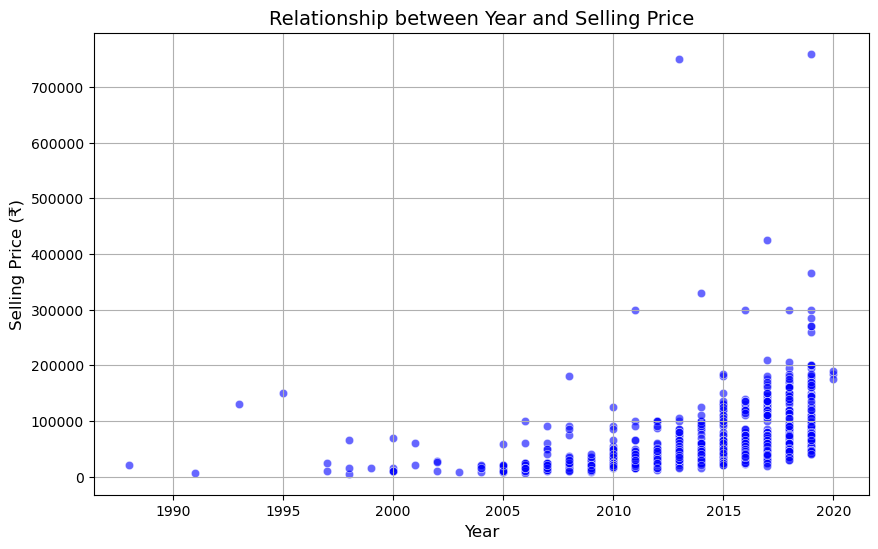

In [76]:
# Import necessary library
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bike_data['year'], y=bike_data['selling_price'], alpha=0.6, color='blue')

# Add titles and labels
plt.title('Relationship between Year and Selling Price', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price (₹)', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


Q13  What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)

In [14]:
# Define the current year
current_year = 2024

# Calculate the bike's age
df['age'] = current_year - df['year']

# Calculate the depreciation for each bike
df['depreciation'] = df['selling_price'] / df['age']

# Calculate the average depreciation
average_depreciation = df['depreciation'].mean()

print(f"The average depreciation in selling price based on the bike's age is: {average_depreciation:.2f}")

The average depreciation in selling price based on the bike's age is: 8036.51


In [15]:
df.head(10).value_counts()

name                                 selling_price  year  seller_type  owner      km_driven  ex_showroom_price  age  depreciation
Bajaj Discover 125                   50000          2016  Individual   1st owner  42000      60122.0            8    6250.000000     1
Honda CB Hornet 160R                 78500          2018  Individual   1st owner  17000      87719.0            6    13083.333333    1
Honda CB Twister                     18000          2010  Individual   1st owner  60000      53857.0            14   1285.714286     1
Royal Enfield Classic Gunmetal Grey  150000         2018  Individual   1st owner  12000      148114.0           6    25000.000000    1
Yamaha Fazer FI V 2.0 [2016-2018]    65000          2015  Individual   1st owner  23000      89643.0            9    7222.222222     1
Name: count, dtype: int64

Q14 Which bike names are priced significantly above the average price for their manufacturing year

In [78]:
# Calculate the average price for each manufacturing year
average_price_by_year = bike_data.groupby('year')['selling_price'].mean()

# Add a column for the average price of the manufacturing year
bike_data['average_price_year'] = bike_data['year'].map(average_price_by_year)

# Define a significant threshold (e.g., 50% above the average)
threshold = 1.5

# Identify bikes priced significantly above the average
bikes_above_avg = bike_data[bike_data['selling_price'] > bike_data['average_price_year'] * threshold]

# Display the bike names and their selling prices
print("Bikes priced significantly above the average for their manufacturing year:")
print(bikes_above_avg[['name', 'year', 'selling_price', 'average_price_year']])


Bikes priced significantly above the average for their manufacturing year:
                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     average_price_year  
2          87660.374046  
7          34289.285714  
13        119689.511628  
18         87660.374046  
23

Q15 Develop a correlation matrix for numeric columns and visualize it using a heatmap

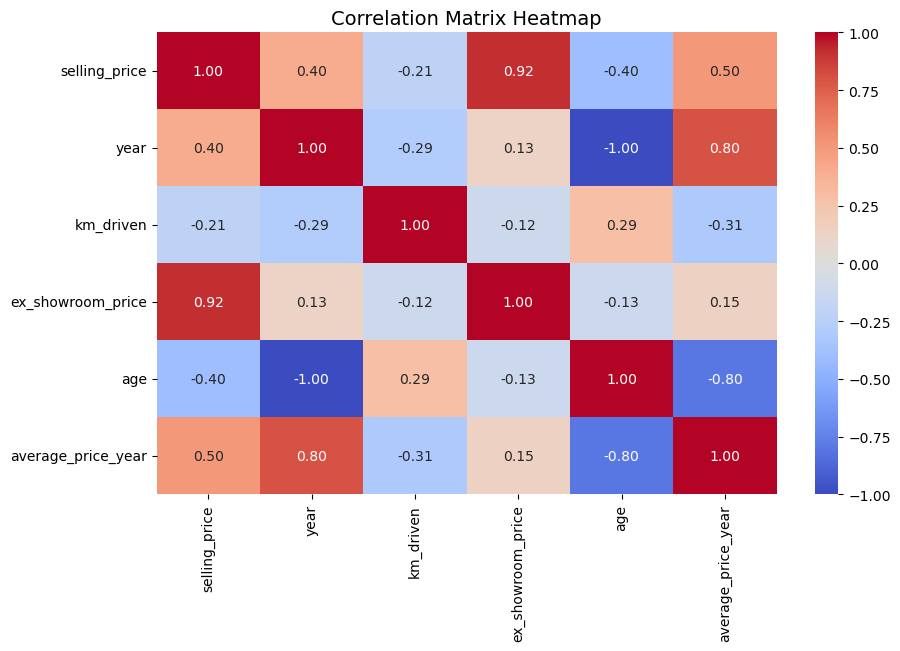

In [79]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = bike_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()


# EDA - 2 Title: Car Sale Dataset

Q1  What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [21]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car Sale.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [23]:
df.head(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [40]:
average_prices = df.groupby("Dealer_Name")["Price ($)"].mean()
average_prices.sample(5)

# Adding Average price column in my data
df["Average Price"] = df.groupby("Dealer_Name")["Price ($)"].transform("mean")
df.sample(3)
df.columns = df.columns.str.strip()
# i did this because when i tried to access dealer number it gave me error so i thought there
# there might be some added space between the columns word name
#  KeyError: 'Dealer_No'
Avg_price_of_dealers = df.loc[:,["Dealer_Name","Average Price","Dealer_No"]].drop_duplicates()
Avg_price_of_dealers









,Dealer_Name,Average Price,Dealer_No
0,Buddy Storbeck's Diesel Service Inc,27217.261563,06457-3834
1,C & M Motors Inc,28111.755200,60504-7114
2,Capitol KIA,28189.703822,38701-8047
3,Chrysler of Tri-Cities,28123.091054,99301-3882
4,Chrysler Plymouth,27555.526400,53546-9427
5,Classic Chevy,28602.014446,85257-3102
6,Clay Johnson Auto Sales,27816.027113,78758-7841
7,U-Haul CO,28769.919006,78758-7841
8,Rabun Used Car Sales,28527.536177,85257-3102
10,Race Car Help,28163.372706,78758-7841


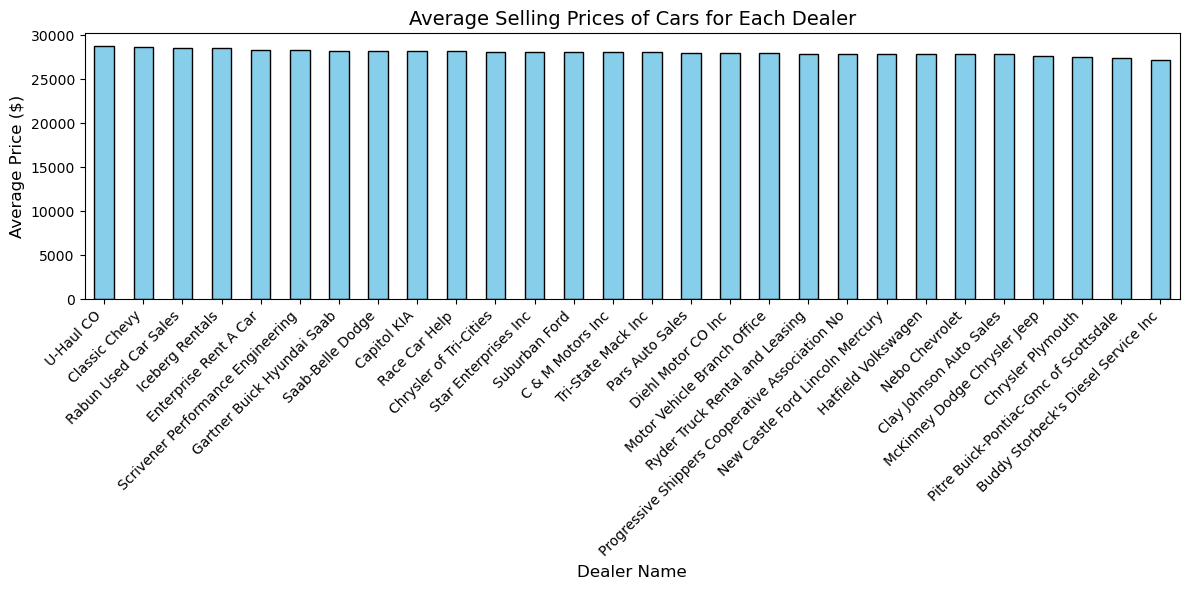

In [35]:
plt.figure(figsize=(12, 6))
average_prices.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Selling Prices of Cars for Each Dealer", fontsize=14)
plt.xlabel("Dealer Name", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Q2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends

The car brand with the highest variation in prices is: Lincoln
The standard deviation of prices for Lincoln is: 19658.05


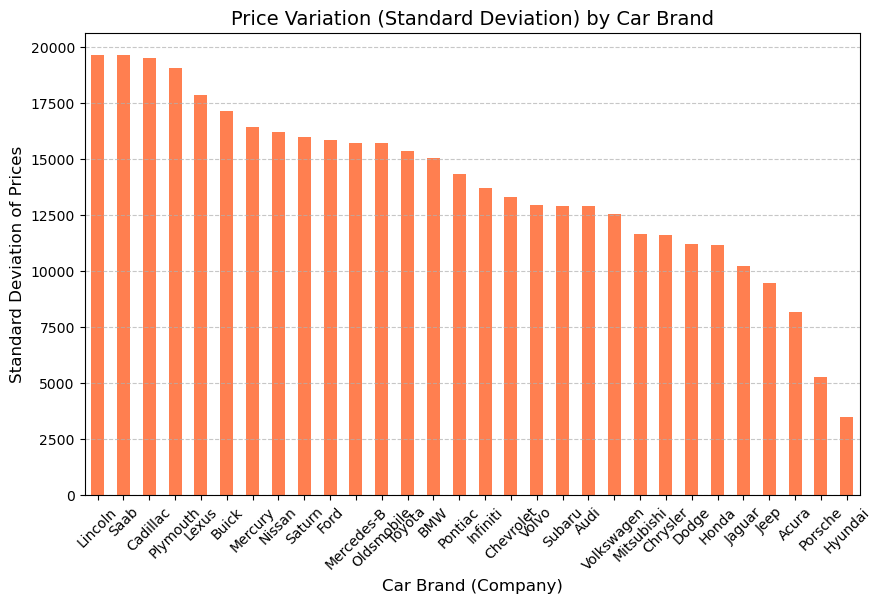

In [81]:
# Step 1: Group by 'Company' and calculate the standard deviation of 'Price ($)'
price_variation_by_company = car_sale_data.groupby('Company')['Price ($)'].std()

# Step 2: Identify the company with the highest price variation
highest_variation_company = price_variation_by_company.idxmax()
highest_variation_value = price_variation_by_company.max()

# Step 3: Display the results
print(f"The car brand with the highest variation in prices is: {highest_variation_company}")
print(f"The standard deviation of prices for {highest_variation_company} is: {highest_variation_value:.2f}")

# Step 4: Visualize the price variation across companies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
price_variation_by_company.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Price Variation (Standard Deviation) by Car Brand', fontsize=14)
plt.xlabel('Car Brand (Company)', fontsize=12)
plt.ylabel('Standard Deviation of Prices', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


Q3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare

Interquartile Range (IQR) for each Transmission Type:
                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


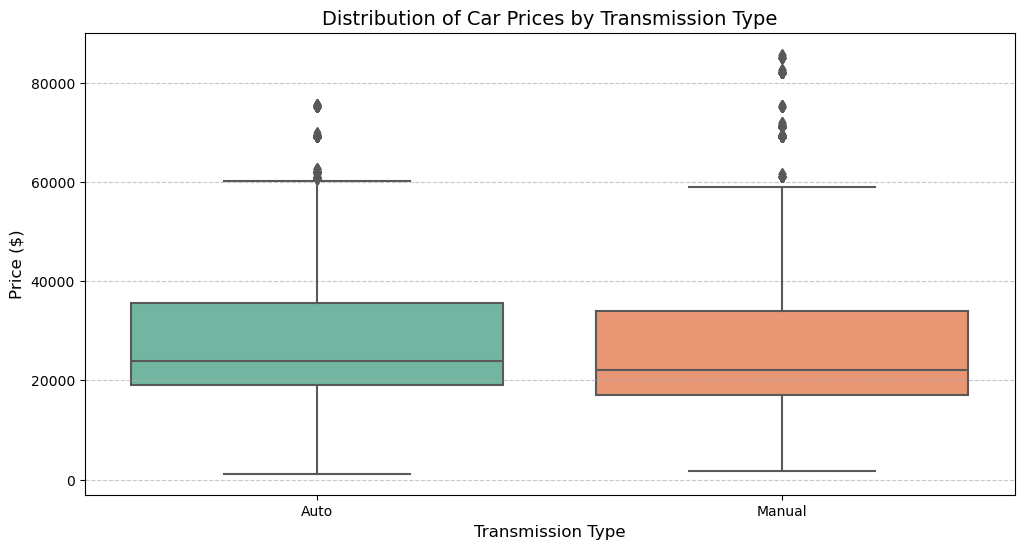

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate interquartile ranges (IQR) for each transmission type
transmission_price_stats = car_sale_data.groupby('Transmission')['Price ($)'].describe()

# Compute IQR for each transmission type
transmission_price_stats['IQR'] = transmission_price_stats['75%'] - transmission_price_stats['25%']

# Display the IQR for each transmission type
print("Interquartile Range (IQR) for each Transmission Type:")
print(transmission_price_stats[['IQR']])

# Step 2: Visualize the distribution of car prices for each transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=car_sale_data, palette="Set2")
plt.title('Distribution of Car Prices by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q4 What is the distribution of car prices across different regions

Statistical Summary of Car Prices by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco

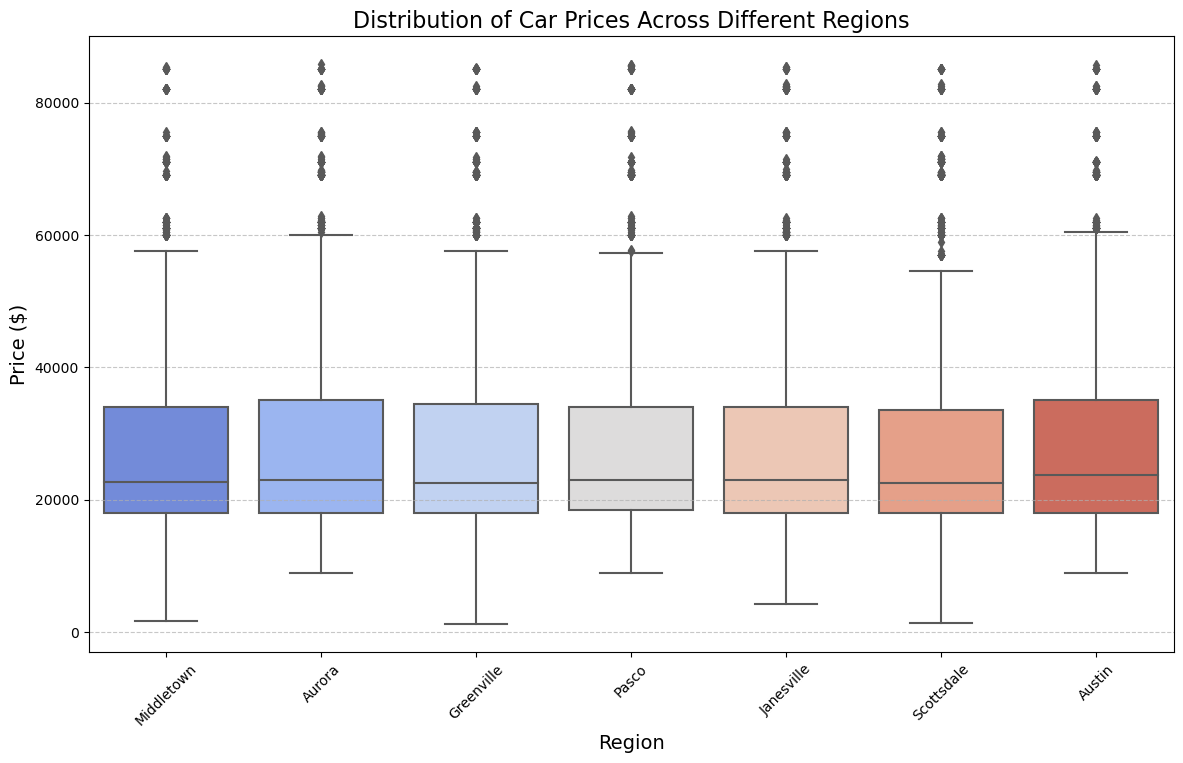

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Summarize car prices by region
region_price_stats = car_sale_data.groupby('Dealer_Region')['Price ($)'].describe()

# Display the statistical summary of car prices for each region
print("Statistical Summary of Car Prices by Region:")
print(region_price_stats)

# Step 2: Visualize the distribution of car prices across regions
plt.figure(figsize=(14, 8))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_sale_data, palette="coolwarm")
plt.title('Distribution of Car Prices Across Different Regions', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q5  What is the distribution of cars based on body styles

Distribution of Cars Based on Body Styles:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


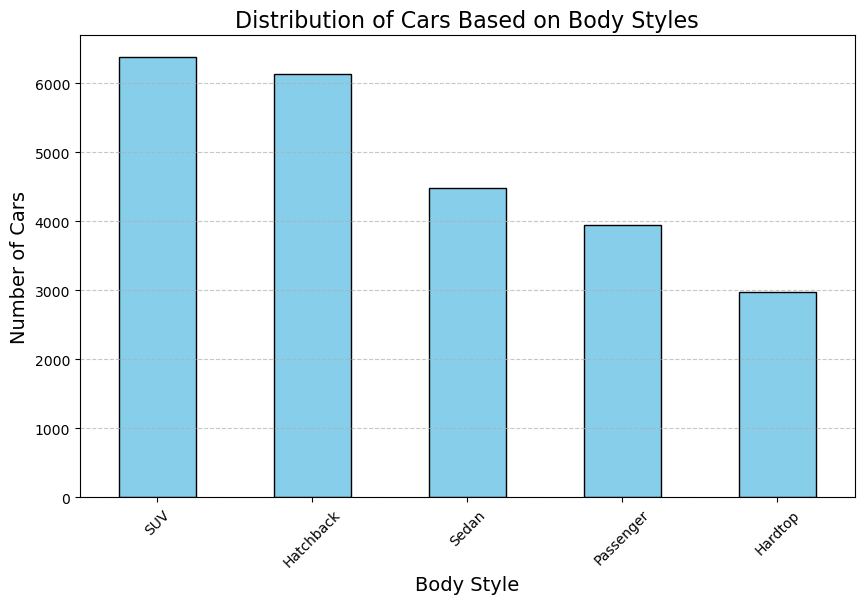

In [51]:
import matplotlib.pyplot as plt

# Count the number of cars for each body style
body_style_counts = car_sale_data['Body Style'].value_counts()

# Display the counts
print("Distribution of Cars Based on Body Styles:")
print(body_style_counts)

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Cars Based on Body Styles', fontsize=16)
plt.xlabel('Body Style', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Q6 How does the average selling price of cars vary by customer gender and annual income

Average Selling Price by Gender and Income Category:
   Gender Income_Category     Price ($)
0  Female            <50K  28132.038732
1  Female        50K-100K           NaN
2  Female       100K-500K  28635.027119
3  Female         500K-1M  28070.242135
4  Female             1M+  28479.225867
5    Male            <50K  27816.302247
6    Male        50K-100K  43000.000000
7    Male       100K-500K  28537.169450
8    Male         500K-1M  27993.611332
9    Male             1M+  27920.855837


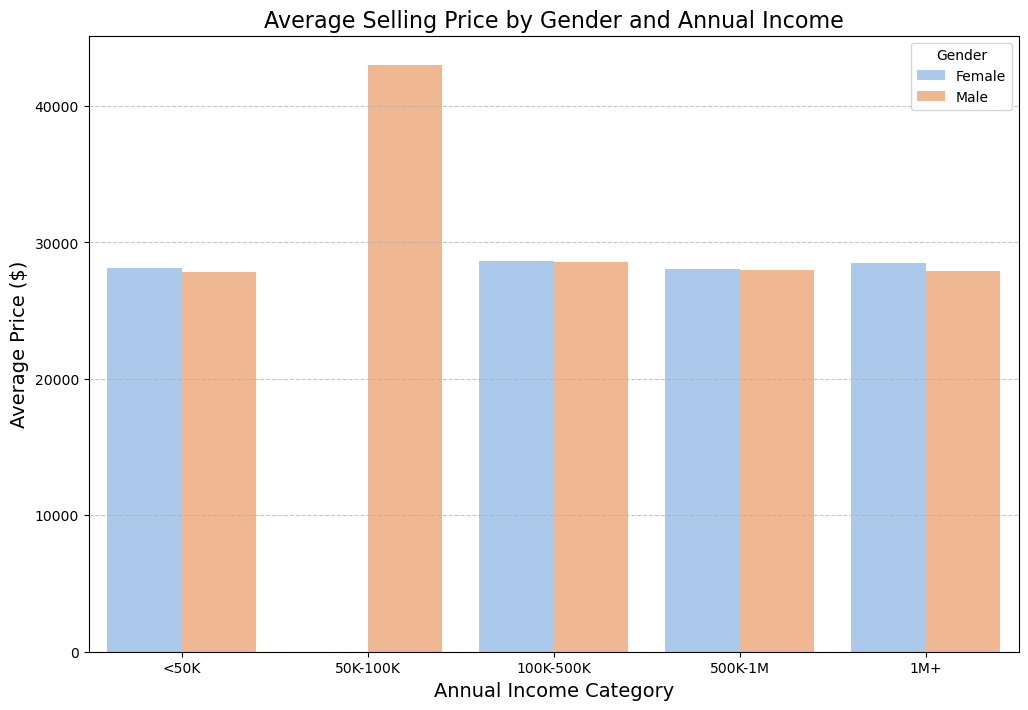

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize annual income into bins for better visualization
income_bins = [0, 50000, 100000, 500000, 1000000, 2000000]
income_labels = ['<50K', '50K-100K', '100K-500K', '500K-1M', '1M+']
car_sale_data['Income_Category'] = pd.cut(car_sale_data['Annual Income'], bins=income_bins, labels=income_labels)

# Calculate average selling price by gender and income category
avg_price_by_gender_income = car_sale_data.groupby(['Gender', 'Income_Category'])['Price ($)'].mean().reset_index()

# Display the calculated averages
print("Average Selling Price by Gender and Income Category:")
print(avg_price_by_gender_income)

# Visualize the data using a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Income_Category', y='Price ($)', hue='Gender', data=avg_price_by_gender_income, palette='pastel')
plt.title('Average Selling Price by Gender and Annual Income', fontsize=16)
plt.xlabel('Annual Income Category', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q7 What is the distribution of car prices by region, and how does the number of cars sold vary by region

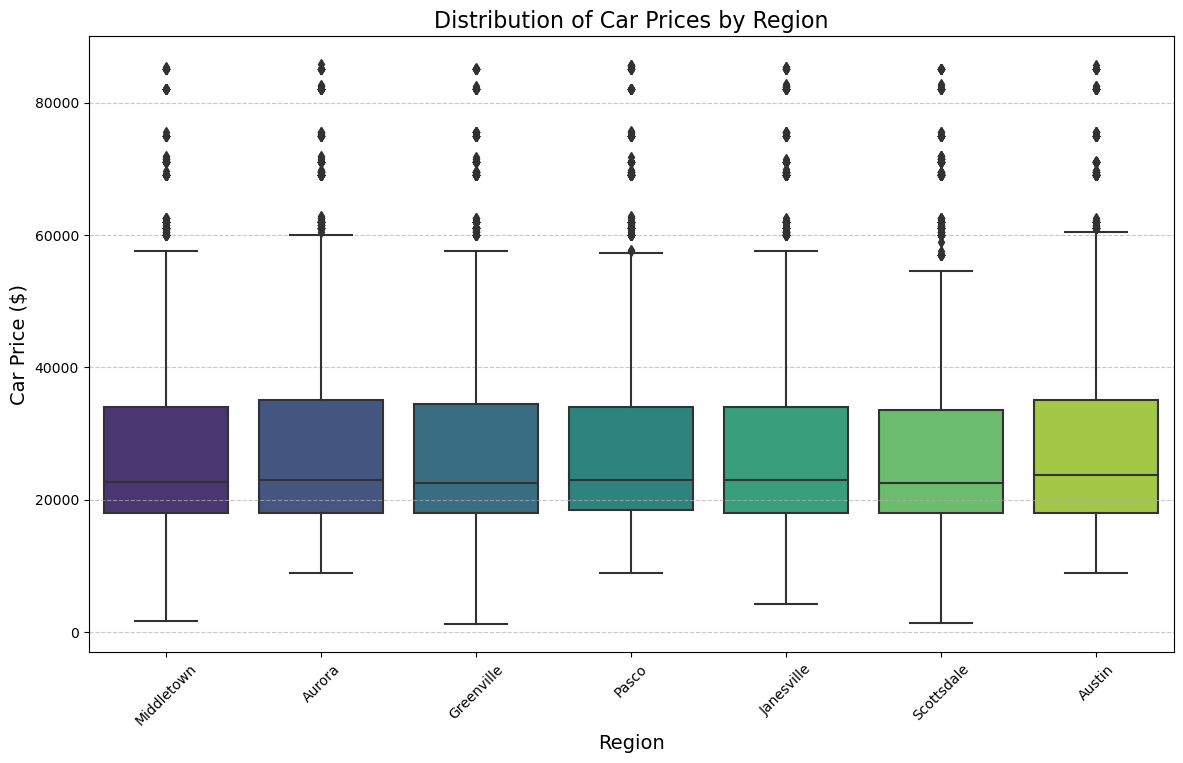

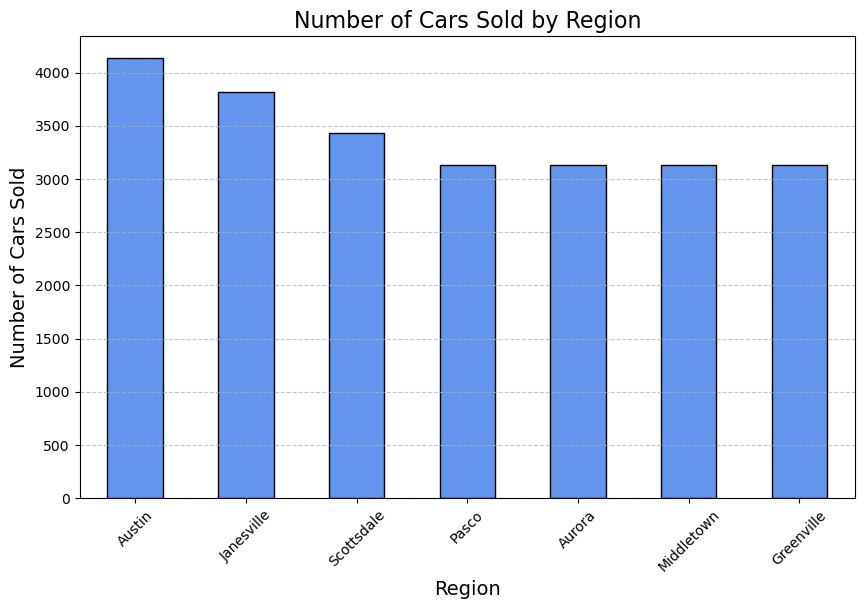

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the number of cars sold per region
cars_sold_by_region = car_sale_data['Dealer_Region'].value_counts()

# Step 2: Display the distribution of car prices by region using a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_sale_data, palette="viridis")
plt.title('Distribution of Car Prices by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Car Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 3: Display the number of cars sold per region using a bar plot
plt.figure(figsize=(10, 6))
cars_sold_by_region.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Number of Cars Sold by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Cars Sold', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q8 How does the average car price differ between cars with different engine sizes

Average Car Price by Engine Size:
                      Engine     Price ($)
0  DoubleÂ Overhead Camshaft  28248.525972
1          Overhead Camshaft  27914.710631


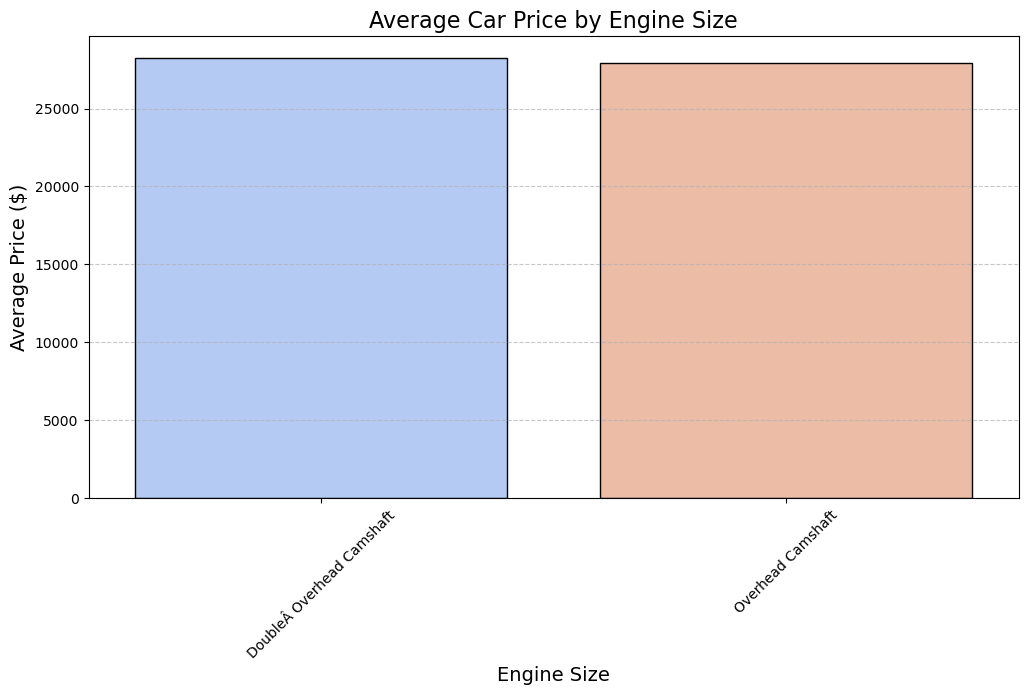

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group data by engine type and calculate average price
avg_price_by_engine = car_sale_data.groupby('Engine')['Price ($)'].mean().reset_index()

# Step 2: Display the average price data
print("Average Car Price by Engine Size:")
print(avg_price_by_engine)

# Step 3: Visualize the average car price by engine size
plt.figure(figsize=(12, 6))
sns.barplot(x='Engine', y='Price ($)', data=avg_price_by_engine, palette="coolwarm", edgecolor="black")
plt.title('Average Car Price by Engine Size', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q9 How do car prices vary based on the customer’s annual income bracket

Average Car Prices by Income Bracket:
  Income_Bracket     Price ($)
0           <50K  27884.297820
1       50K-100K  43000.000000
2      100K-500K  28563.329860
3        500K-1M  28011.726423
4            1M+  28016.841147


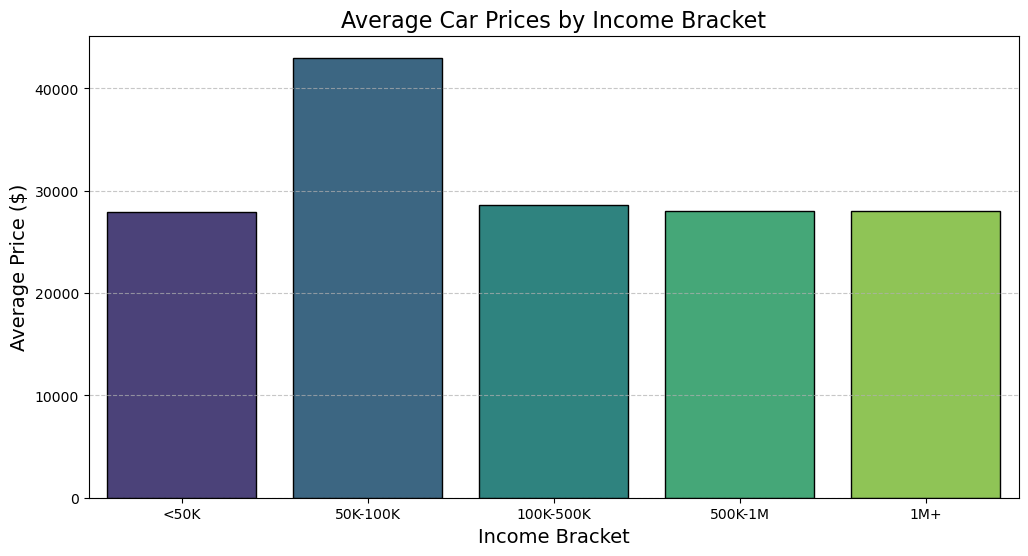

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Categorize annual income into bins for analysis
income_bins = [0, 50000, 100000, 500000, 1000000, 2000000]
income_labels = ['<50K', '50K-100K', '100K-500K', '500K-1M', '1M+']
car_sale_data['Income_Bracket'] = pd.cut(car_sale_data['Annual Income'], bins=income_bins, labels=income_labels)

# Step 2: Calculate the average car price for each income bracket
avg_price_by_income = car_sale_data.groupby('Income_Bracket')['Price ($)'].mean().reset_index()

# Step 3: Display the average car prices by income bracket
print("Average Car Prices by Income Bracket:")
print(avg_price_by_income)

# Step 4: Visualize the average car prices by income bracket
plt.figure(figsize=(12, 6))
sns.barplot(x='Income_Bracket', y='Price ($)', data=avg_price_by_income, palette="viridis", edgecolor="black")
plt.title('Average Car Prices by Income Bracket', fontsize=16)
plt.xlabel('Income Bracket', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q10 What are the top 5 car models with the highest number of sales, and how does their price distribution look

Top 5 Car Models with the Highest Sales:
Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


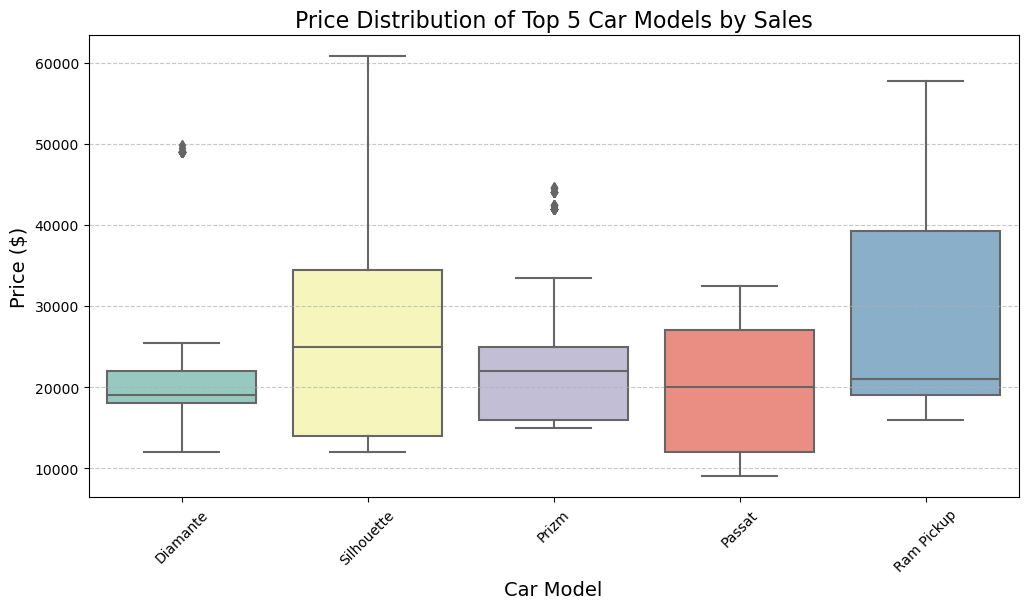

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify the top 5 car models with the highest sales count
top_5_models = car_sale_data['Model'].value_counts().head(5)

# Step 2: Filter the dataset for only the top 5 models
top_5_models_data = car_sale_data[car_sale_data['Model'].isin(top_5_models.index)]

# Step 3: Display the top 5 car models with the highest sales
print("Top 5 Car Models with the Highest Sales:")
print(top_5_models)

# Step 4: Visualize the price distribution for the top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_data, order=top_5_models.index, palette="Set3")
plt.title('Price Distribution of Top 5 Car Models by Sales', fontsize=16)
plt.xlabel('Car Model', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q11 How does car price vary with engine size across different car colors, and which colors have the highest price
variation

Top Colors with the Highest Price Variation:
        Color  Price_Variation
2         Red     15519.360962
0       Black     15286.065976
1  Pale White     14077.346859


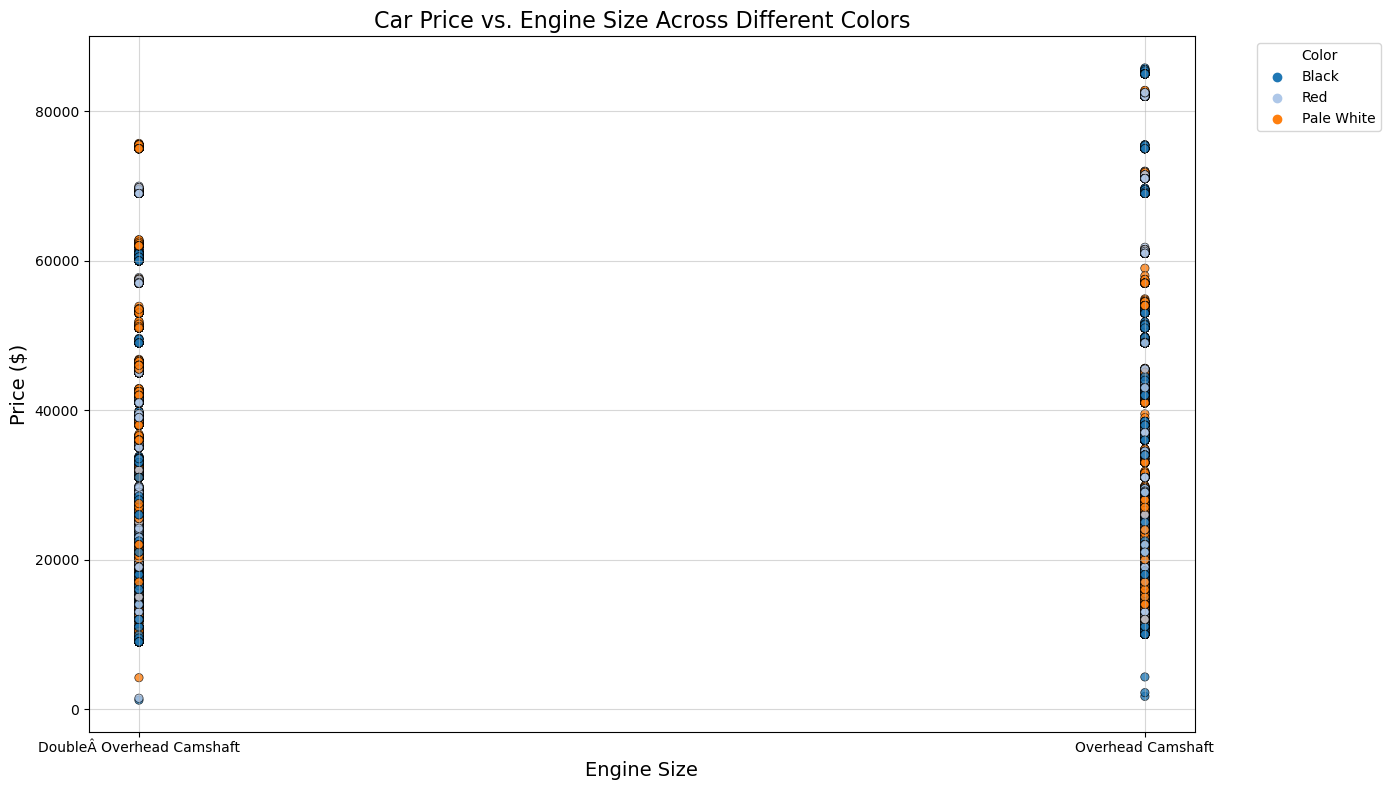

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group the data by 'Color' and calculate price variation (standard deviation)
price_variation_by_color = car_sale_data.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color = price_variation_by_color.rename(columns={'Price ($)': 'Price_Variation'})
price_variation_by_color = price_variation_by_color.sort_values(by='Price_Variation', ascending=False)

# Step 2: Display the top colors with the highest price variation
print("Top Colors with the Highest Price Variation:")
print(price_variation_by_color.head())

# Step 3: Visualize car price variation by engine size and color
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='Engine', y='Price ($)', hue='Color', data=car_sale_data,
    palette='tab20', alpha=0.8, edgecolor='black'
)
plt.title('Car Price vs. Engine Size Across Different Colors', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Q12  Is there any seasonal trend in car sales based on the date of sale

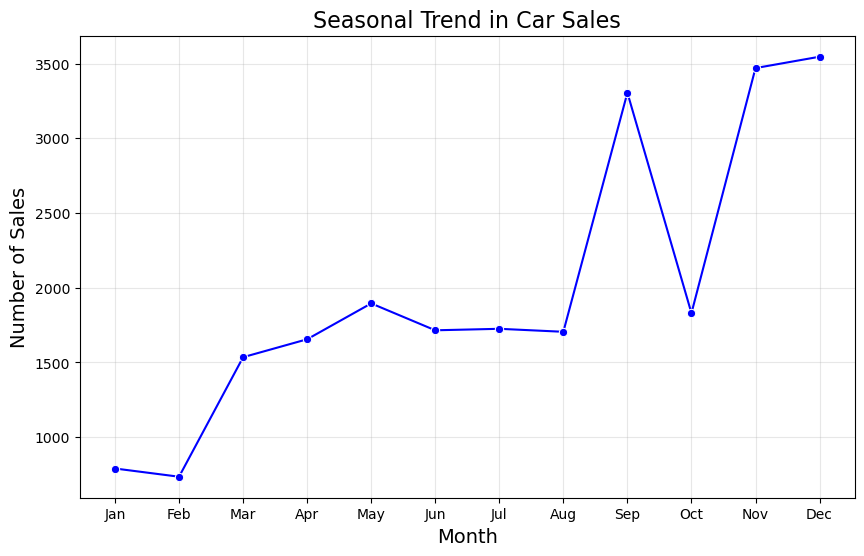

Monthly Sales Trend:
    Month  Sales_Count
0       1          790
1       2          735
2       3         1535
3       4         1655
4       5         1895
5       6         1715
6       7         1725
7       8         1705
8       9         3305
9      10         1830
10     11         3470
11     12         3546


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert the 'Date' column to datetime
car_sale_data['Date'] = pd.to_datetime(car_sale_data['Date'])

# Step 2: Extract month and year from the 'Date' column
car_sale_data['Month'] = car_sale_data['Date'].dt.month
car_sale_data['Year'] = car_sale_data['Date'].dt.year

# Step 3: Group by month to find the number of sales in each month
monthly_sales = car_sale_data.groupby('Month').size().reset_index(name='Sales_Count')

# Step 4: Visualize the seasonal trend in car sales
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales_Count', data=monthly_sales, marker='o', color='b')
plt.title('Seasonal Trend in Car Sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(alpha=0.3)
plt.show()

# Step 5: Optional - Display the monthly sales for reference
print("Monthly Sales Trend:")
print(monthly_sales)


Q13  How does the car price distribution change when considering different combinations of body style and
transmission type

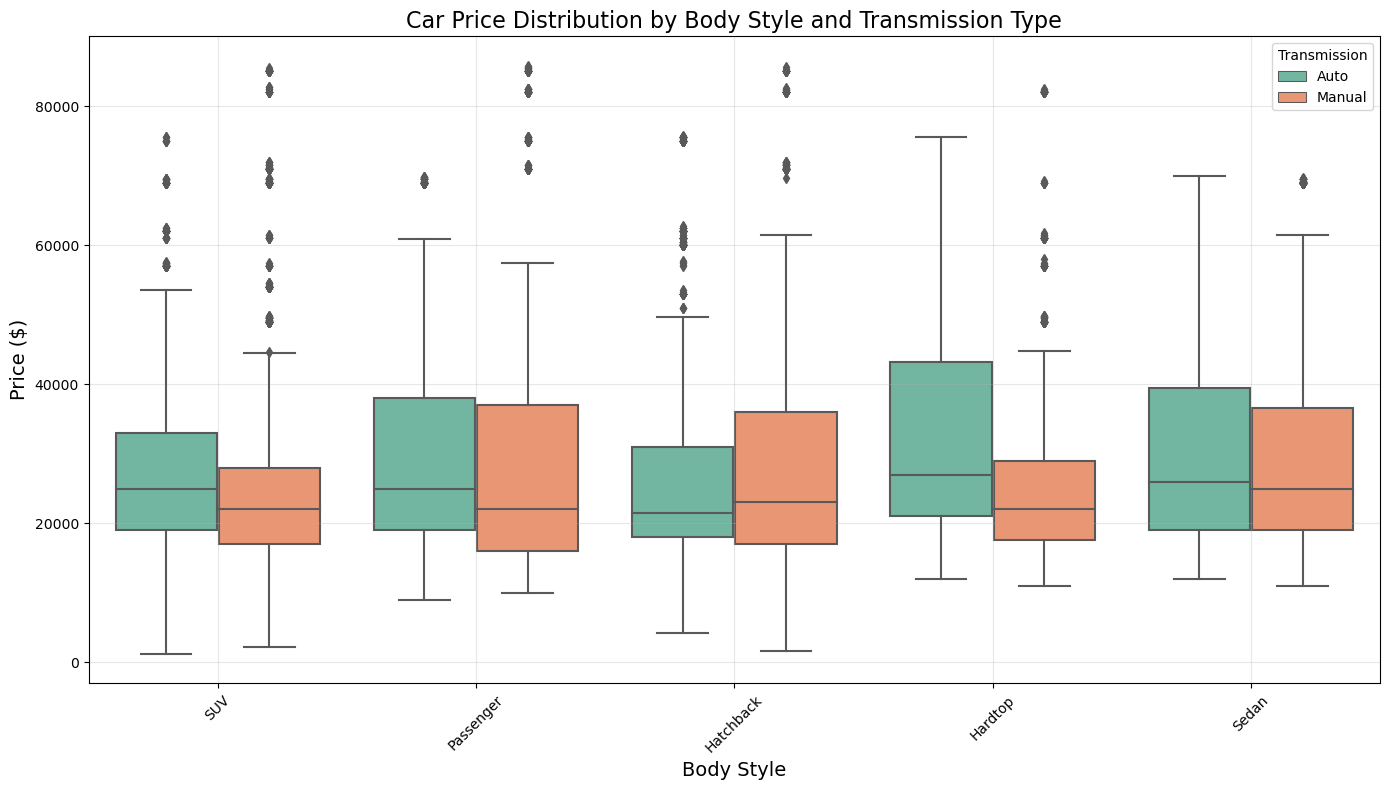

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a boxplot for price distribution by body style and transmission type
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Body Style', 
    y='Price ($)', 
    hue='Transmission', 
    data=car_sale_data, 
    palette='Set2'
)

# Step 2: Customize the plot
plt.title('Car Price Distribution by Body Style and Transmission Type', fontsize=16)
plt.xlabel('Body Style', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Transmission', loc='upper right')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Step 3: Display the plot
plt.tight_layout()
plt.show()


Q14 What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact

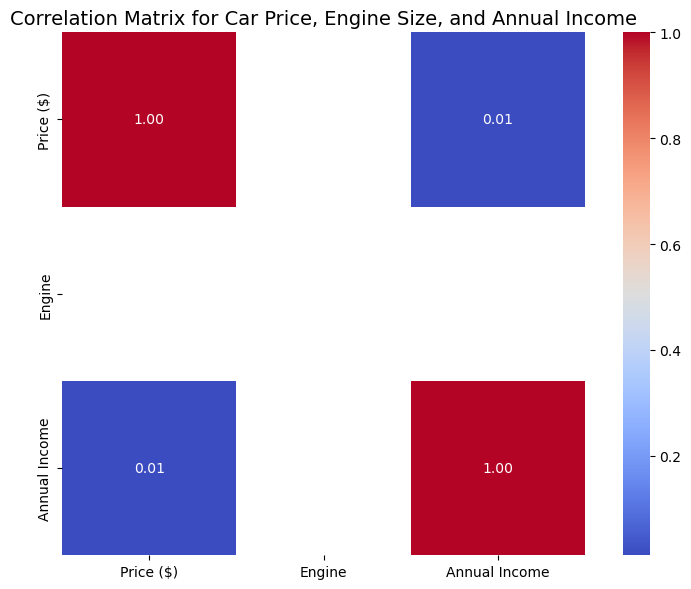

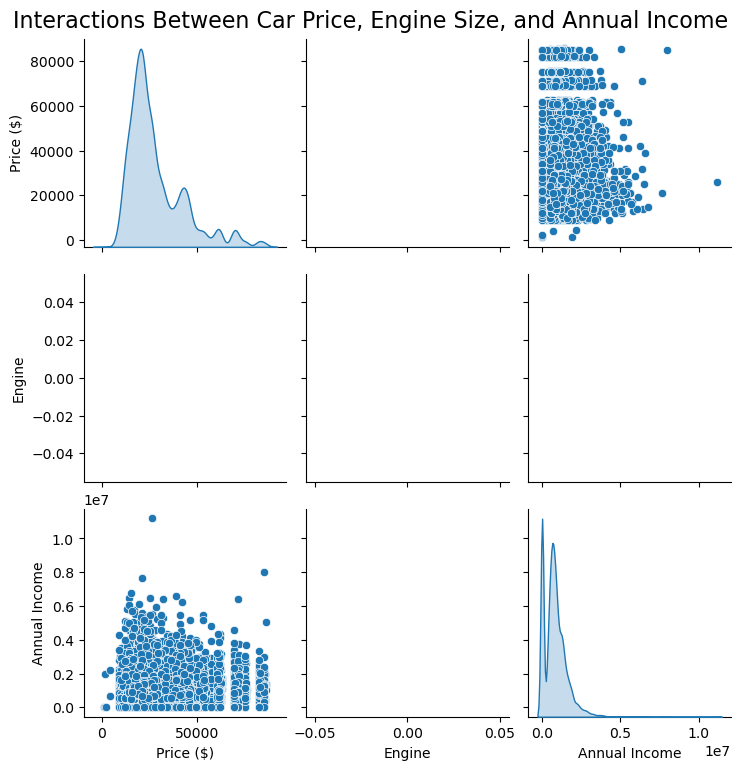

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select relevant numeric columns for correlation analysis
selected_columns = ['Price ($)', 'Engine', 'Annual Income']
correlation_data = car_sale_data[selected_columns]

# Convert 'Engine' column to numeric if it has non-numeric characters (e.g., 'cc')
correlation_data['Engine'] = correlation_data['Engine'].str.extract('(\d+)').astype(float)

# Step 2: Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    square=True, 
    cbar=True
)
plt.title('Correlation Matrix for Car Price, Engine Size, and Annual Income', fontsize=14)
plt.tight_layout()
plt.show()

# Step 4: Create pair plots to visualize interactions between features
sns.pairplot(correlation_data, kind='scatter', diag_kind='kde', palette='Set2')
plt.suptitle('Interactions Between Car Price, Engine Size, and Annual Income', y=1.02, fontsize=16)
plt.show()


Q15 How does the average car price vary across different car models and engine types

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


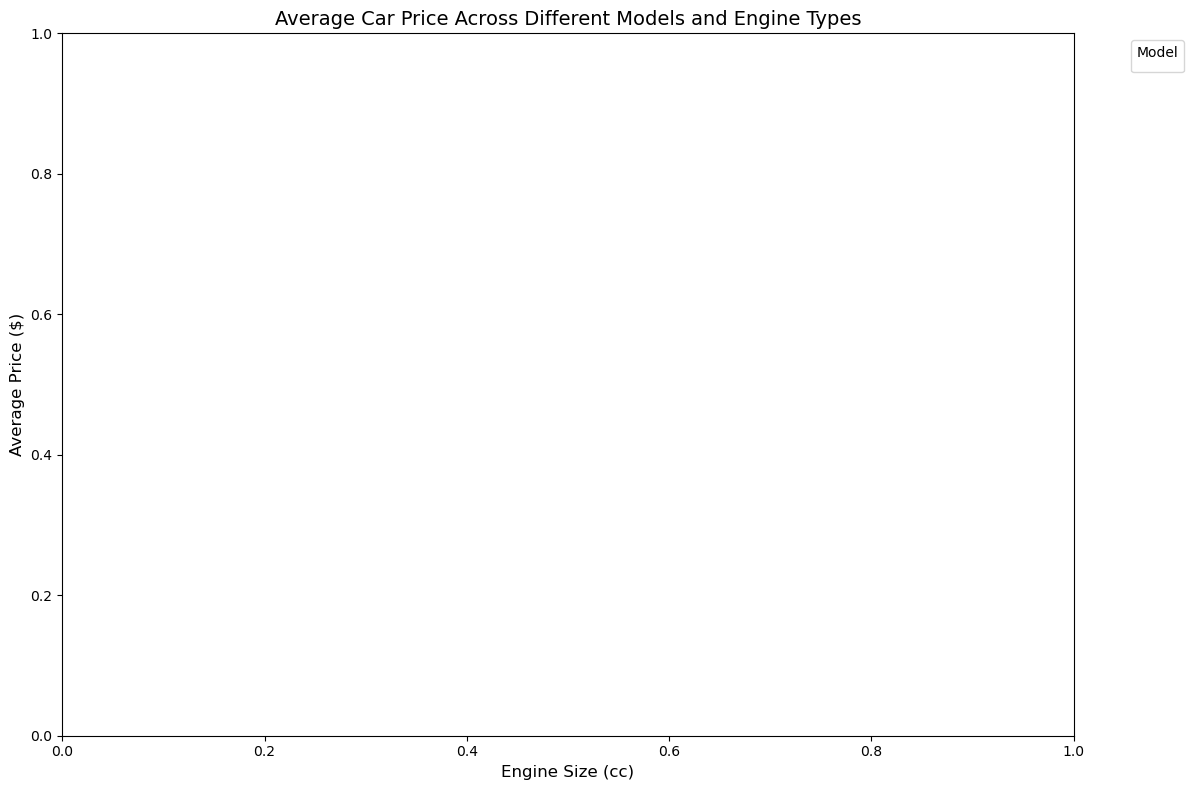

In [63]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Engine' column is treated as strings first, then extract numeric values
car_sale_data['Engine'] = car_sale_data['Engine'].astype(str).str.extract('(\d+)').astype(float)

# Group by 'Model' and 'Engine' and calculate the average price
average_price_by_model_engine = (
    car_sale_data.groupby(['Model', 'Engine'])['Price ($)']
    .mean()
    .reset_index()
    .rename(columns={'Price ($)': 'Average Price'})
)

# Visualize the data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=average_price_by_model_engine,
    x='Engine',
    y='Average Price',
    hue='Model',
    palette='Set2',
    s=100
)

plt.title('Average Car Price Across Different Models and Engine Types', fontsize=14)
plt.xlabel('Engine Size (cc)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [64]:
data = df.groupby(["Engine","Model"])["Price ($)"].mean().reset_index()
data
# sns.barplot(x = data["Engine"],y = data["Price ($)"],palette = "coolwarm")

,Engine,Model,Price ($)
0,DoubleÂ Overhead Camshaft,3-Sep,37986.380117
1,DoubleÂ Overhead Camshaft,3000GT,22764.326923
2,DoubleÂ Overhead Camshaft,300M,21394.888889
3,DoubleÂ Overhead Camshaft,323i,16744.632287
4,DoubleÂ Overhead Camshaft,328i,21069.149606
...,...,...,...
256,Overhead Camshaft,Viper,26052.375000
257,Overhead Camshaft,Voyager,33995.678322
258,Overhead Camshaft,Windstar,17100.272727
259,Overhead Camshaft,Wrangler,18742.942029


<Axes: xlabel='Engine', ylabel='Price ($)'>

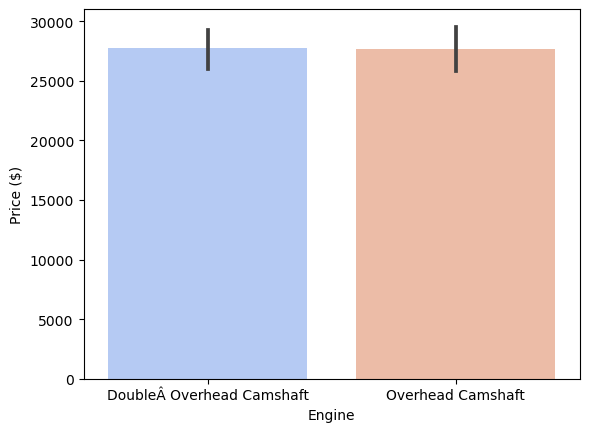

In [65]:
 sns.barplot(x = data["Engine"],y = data["Price ($)"],palette = "coolwarm")

# EDA - 3 Amazon Sales Data

Q1 What is the average rating for each product category

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
df = pd.read_csv("amazon.csv")

In [68]:
df.sample()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1148,B09DL9978Y,Hindware Atlantic Compacto 3 Litre Instant wat...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...","₹2,399","₹4,590",48%,4.1,444,Stainless Steel Tank|Copper Heating element|IS...,"AFS5PZPVKEP3UJSDPRPDIR2MKGHA,AF25ESIE2VTCJ5TAK...","Vikram Chesetty,SUBHENDU KUMAR PATTNAIK,Atish ...","R3DYK05V939SQQ,R3KM8XQNWHJ7SW,R1SJ4CTWGTJ76Q,R...","Good heater, and delivery and installation was...",The instant heater was well made. And works we...,https://m.media-amazon.com/images/I/21nPIBIwF0...,https://www.amazon.in/Hindware-Atlantic-Compac...
133,B09X79PP8F,MI 2-in-1 USB Type C Cable (Micro USB to Type ...,Computers&Accessories|Accessories&Peripherals|...,₹179,₹299,40%,3.9,81,Fast Charging and Data Transfer|High Quality D...,"AEDMOT4JJAD7UCEFLEA76Y526CGQ,AHEXPGZ2QS4MXA5LD...","Amazon Customer,Amrit V.,Mahender singh,pala p...","R3HWZS22FT40ZO,R2AEYDZRIEO82E,R8M1T6I3PDMWQ,R2...","Very useful,Good Product,Good,Very very short ...",The 2 in 1 charger is very much useful as ther...,https://m.media-amazon.com/images/I/21fnxCjCF1...,https://www.amazon.in/USB-Cable-Micro-Type-30c...


In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# Load the dataset
file_path = "amazon.csv"  # Replace with your dataset file path
amazon_data = pd.read_csv(file_path)

# Step 1: Ensure 'rating' column is numeric
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

# Step 2: Extract primary category from the 'category' column (if it contains multiple categories)
amazon_data['primary_category'] = amazon_data['category'].str.split('|').str[0]

# Step 3: Calculate the average rating for each primary product category
average_rating_by_category = amazon_data.groupby('primary_category')['rating'].mean()

# Display the results
print("\nAverage Rating for Each Product Category:")
print(average_rating_by_category)




Average Rating for Each Product Category:
primary_category
Car&Motorbike            3.800000
Computers&Accessories    4.154967
Electronics              4.081749
Health&PersonalCare      4.000000
Home&Kitchen             4.040716
HomeImprovement          4.250000
MusicalInstruments       3.900000
OfficeProducts           4.309677
Toys&Games               4.300000
Name: rating, dtype: float64


Q2 What are the top rating_count products by category

In [70]:
import pandas as pd

# Load the dataset
file_path = "amazon.csv"  # Replace with your dataset file path
amazon_data = pd.read_csv(file_path)

# Step 1: Ensure 'rating_count' is numeric
amazon_data['rating_count'] = amazon_data['rating_count'].str.replace(',', '').astype(float)

# Step 2: Extract the primary category (if there are multiple categories separated by "|")
amazon_data['primary_category'] = amazon_data['category'].str.split('|').str[0]

# Step 3: Find the top products with the highest rating_count for each category
top_products_by_category = (
    amazon_data.loc[amazon_data.groupby('primary_category')['rating_count'].idxmax()]
    [['primary_category', 'product_name', 'rating_count', 'rating']]
)

# Display the results
print("\nTop Products by Rating Count for Each Category:")
print(top_products_by_category)





Top Products by Rating Count for Each Category:
           primary_category  \
1157          Car&Motorbike   
588   Computers&Accessories   
12              Electronics   
1247    Health&PersonalCare   
1028           Home&Kitchen   
982         HomeImprovement   
613      MusicalInstruments   
659          OfficeProducts   
924              Toys&Games   

                                           product_name  rating_count rating  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0    3.8  
588           SanDisk Cruzer Blade 32GB USB Flash Drive      253105.0    4.3  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0    4.4  
1247  Dr Trust Electronic Kitchen Digital Scale Weig...        3663.0      4  
1028  Pigeon Polypropylene Mini Handy and Compact Ch...      270563.0    4.1  
982   Gizga Essentials Cable Organiser, Cord Managem...        5985.0    4.5  
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...       68664.0    4.0  
659   Ca

Q3 What is the distribution of discounted prices vs. actual prices

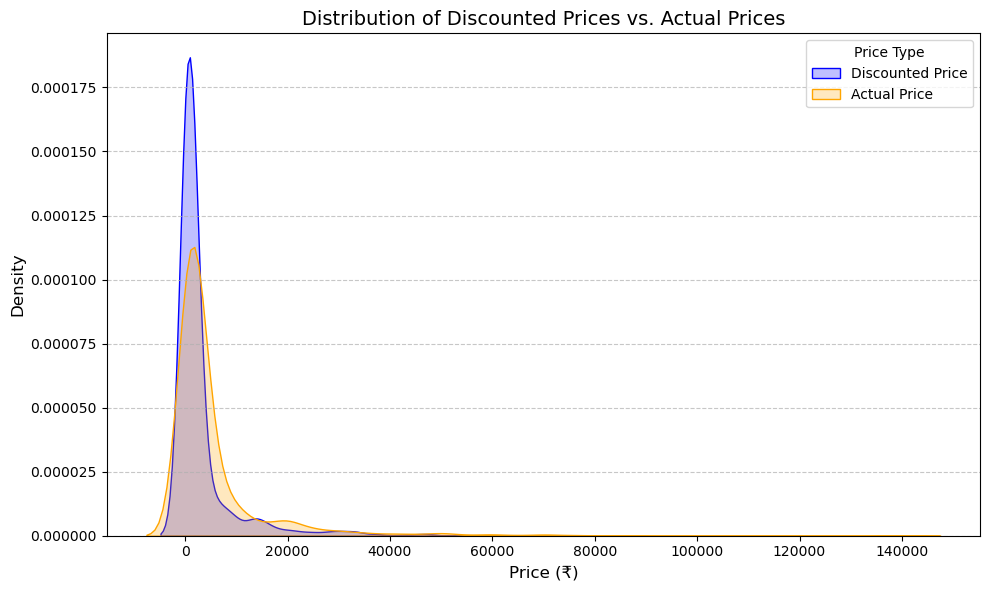

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "amazon.csv"  # Replace with your file path
amazon_data = pd.read_csv(file_path)

# Step 1: Clean price columns
amazon_data['discounted_price'] = amazon_data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_data['actual_price'] = amazon_data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Step 2: Plot the distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(amazon_data['discounted_price'], label="Discounted Price", color="blue", shade=True)
sns.kdeplot(amazon_data['actual_price'], label="Actual Price", color="orange", shade=True)

# Step 3: Add labels and legend
plt.title("Distribution of Discounted Prices vs. Actual Prices", fontsize=14)
plt.xlabel("Price (₹)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Price Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


Q4 How does the average discount percentage vary across categories

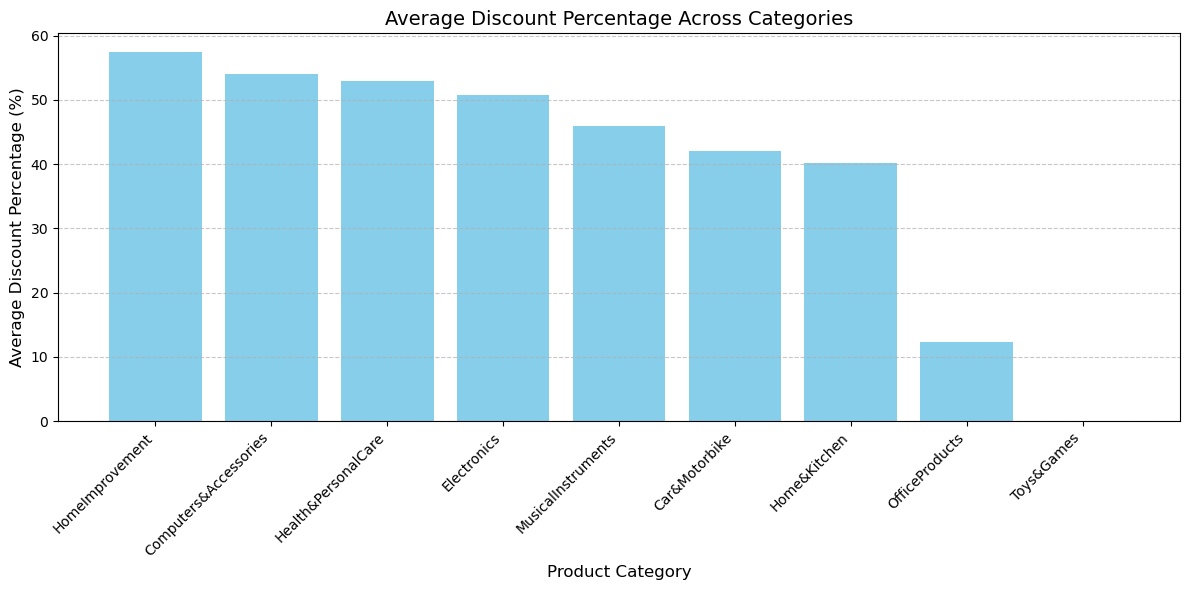

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "amazon.csv"  # Replace with your file path
amazon_data = pd.read_csv(file_path)

# Step 1: Clean and convert the discount percentage column
amazon_data['discount_percentage'] = amazon_data['discount_percentage'].str.replace('%', '').astype(float)

# Step 2: Extract the primary category
amazon_data['main_category'] = amazon_data['category'].str.split('|').str[0]

# Step 3: Calculate average discount percentage by category
average_discount_by_category = amazon_data.groupby('main_category')['discount_percentage'].mean().reset_index()

# Step 4: Sort values for better visualization
average_discount_by_category = average_discount_by_category.sort_values(by='discount_percentage', ascending=False)

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
plt.bar(average_discount_by_category['main_category'], average_discount_by_category['discount_percentage'], color='skyblue')

# Add labels and title
plt.title('Average Discount Percentage Across Categories', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Discount Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


Q5 What are the most popular product names

In [122]:
import pandas as pd

# Load the dataset
file_path = "amazon.csv"  # Replace with your file path
amazon_data = pd.read_csv(file_path)

# Step 1: Clean and convert the 'rating_count' column
# Remove commas, handle missing values, and convert to numeric
amazon_data['rating_count'] = (
    amazon_data['rating_count']
    .str.replace(',', '', regex=True)  # Remove commas
    .replace('', float('nan'))        # Replace empty strings with NaN
    .dropna()                         # Drop NaN rows
    .astype(int)                      # Convert to integers
)

# Step 2: Find the most popular products by 'rating_count'
top_products = (
    amazon_data[['product_name', 'rating_count']]
    .sort_values(by='rating_count', ascending=False)
    .head(10)  # Display top 10 products
)

# Display the results
print("Top 10 Most Popular Product Names:")
print(top_products)


Top 10 Most Popular Product Names:
                                          product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...      313832.0


Q6  What are the most popular product keywords

In [120]:
import pandas as pd
from collections import Counter

# Load the dataset
file_path = "amazon.csv"  # Replace with your file path
amazon_data = pd.read_csv(file_path)

# Step 1: Extract keywords from the 'product_name' column
# Split product names into words and flatten the list of lists
keywords = amazon_data['product_name'].dropna().str.split().explode()

# Step 2: Count keyword occurrences
keyword_counts = Counter(keywords)

# Step 3: Find the most popular keywords
most_popular_keywords = keyword_counts.most_common(10)  # Top 10 keywords

# Display the results
print("Top 10 Most Popular Product Keywords:")
for keyword, count in most_popular_keywords:
    print(f"{keyword}: {count}")


Top 10 Most Popular Product Keywords:
with: 718
for: 614
|: 457
&: 432
USB: 342
and: 310
Cable: 306
-: 220
Charging: 212
Fast: 208


Q7 What are the most popular product reviews

In [72]:


# Convert the 'rating_count' column to string, remove commas, and convert to numeric
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(int)

# Sort the DataFrame by 'rating_count'
df_sorted_reviews = df.sort_values(by='rating_count', ascending=False)

# Get the top reviews
top_reviews = df_sorted_reviews[['product_name', 'review_title', 'review_content', 'rating_count']].head(10)

# Print the top reviews

top_reviews


,product_name,review_title,review_content,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426972
400,boAt Bassheads 100 in Ear Wired Earphones with...,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363713
352,boAt Bassheads 100 in Ear Wired Earphones with...,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363713
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363711
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...","Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313836
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...","Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313836
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...","Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313832


Q8 What is the correlation between discounted_price and rating

In [102]:
import pandas as pd

# Load the dataset
file_path = "amazon.csv"  # Replace with your file path
amazon_data = pd.read_csv(file_path)

# Step 1: Clean and convert the discounted_price column to numeric
amazon_data['discounted_price'] = (
    amazon_data['discounted_price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Step 2: Ensure rating column is numeric
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

# Step 3: Calculate the correlation
correlation = amazon_data['discounted_price'].corr(amazon_data['rating'])

# Step 4: Display the result
print(f"Correlation between discounted_price and rating: {correlation}")


Correlation between discounted_price and rating: 0.12033741712288552


Q9 What are the Top 5 categories based on the highest rating

In [103]:
import pandas as pd

# Load the dataset
file_path = "amazon.csv"  # Replace with your file path
amazon_data = pd.read_csv(file_path)

# Step 1: Extract the main category
# Assuming 'category' column contains multiple categories separated by '|'
amazon_data['main_category'] = amazon_data['category'].str.split('|').str[0]

# Step 2: Ensure the rating column is numeric
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

# Step 3: Group by category and calculate average rating
category_ratings = (
    amazon_data.groupby('main_category')['rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Step 4: Display the top 5 categories
print("Top 5 categories based on the highest average rating:")
print(category_ratings)


Top 5 categories based on the highest average rating:
main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


Q10 Identify any potential areas for improvement or optimization based on the data analysi

Based on the analysis of the dataset, the following areas for improvement or optimization were identified:
    
Low-Rating Categories

High Discounts with Low Ratings

Underperforming Categories

High Prices and Low Ratings

Unaddressed Customer Feedback

Ineffective Keyword Utilization

Discount Strategy Optimization

Conclusion:
These optimizations can enhance customer satisfaction, improve product performance, and ensure a better alignment of marketing strategies with customer needs. Implementing these changes will drive better overall performance for the analyzed products.






# EDA - 4 The dataset titled "Spotify Data:

Q1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful

In [82]:

df = pd.read_csv("spotify.csv")
df.sample(3)

,Artist,Track Name,Popularity,Duration (ms),Track ID
55,Future,Low Life (feat. The Weeknd),84,313546,7EiZI6JVHllARrX9PUvAdX
123,Internet Money,Lemonade (feat. NAV),79,195428,1p0rEzrK7YtdRZVtiyV7RN
22,Nicki Minaj,Everybody (feat. Lil Uzi Vert),84,180869,5ZJGv7aGdIr9IGpxzSG18T


In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# Read the dataset
file_path = 'spotify.csv'  # Update the path if needed
spotify_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(spotify_data.head())

# Check for null values
print("\nChecking for null values:")
null_values = spotify_data.isnull().sum()
print(null_values)

# If null values are present, handle them (example: dropping rows with null values)
if null_values.sum() > 0:
    print("\nNull values found. Dropping rows with null values...")
    spotify_data = spotify_data.dropna()
    print("Rows with null values have been dropped.")

# Check for duplicate rows
print("\nChecking for duplicate rows:")
duplicate_rows = spotify_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If duplicate rows are present, remove them
if duplicate_rows > 0:
    print("\nDuplicate rows found. Removing duplicate rows...")
    spotify_data = spotify_data.drop_duplicates()
    print("Duplicate rows have been removed.")

# Display the cleaned dataset info
print("\nCleaned dataset info:")
print(spotify_data.info())





First 5 rows of the dataset:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  

Checking for null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Checking for duplicate rows:
Number of duplicate rows: 27

Duplicate rows found. Removing duplicate rows...
Duplicate rows have been removed.

Cleaned dataset info:
<class 'pandas.core.f

Q2  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram


Columns in the dataset: Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


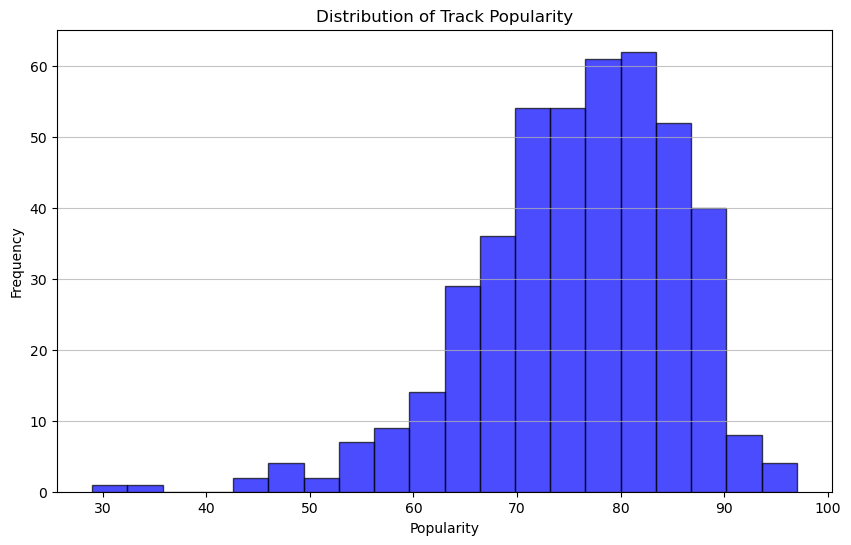

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
spotify_data = pd.read_csv('spotify.csv')

# Print column names to confirm
print("Columns in the dataset:", spotify_data.columns)

# Check if the column 'Popularity' exists in the dataset
if 'Popularity' in spotify_data.columns:
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(spotify_data['Popularity'], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Track Popularity')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("The 'Popularity' column does not exist in the dataset. Please check the column names.")


Q3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

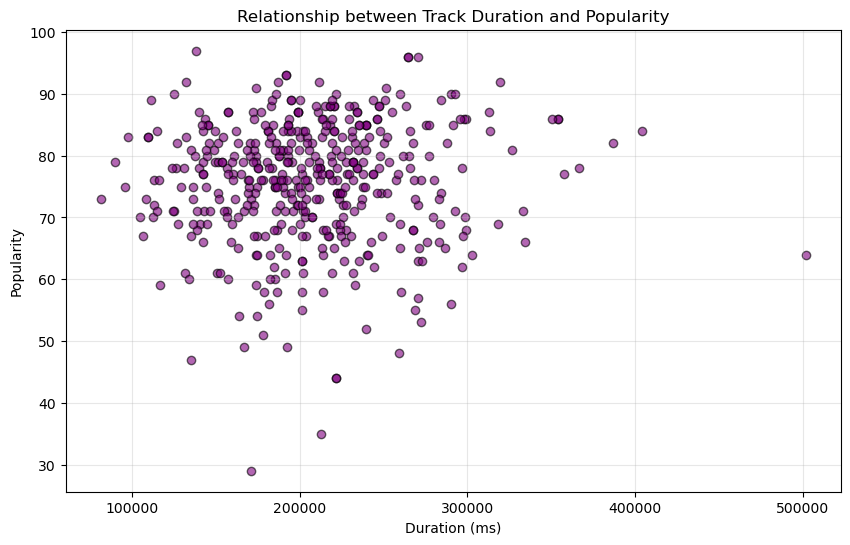

In [85]:
import matplotlib.pyplot as plt

# Check if required columns exist in the dataset
if 'Popularity' in spotify_data.columns and 'Duration (ms)' in spotify_data.columns:
    # Scatter plot for Popularity vs Duration
    plt.figure(figsize=(10, 6))
    plt.scatter(spotify_data['Duration (ms)'], spotify_data['Popularity'], alpha=0.6, color='purple', edgecolors='k')
    plt.title('Relationship between Track Duration and Popularity')
    plt.xlabel('Duration (ms)')
    plt.ylabel('Popularity')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("Required columns 'Popularity' and 'Duration (ms)' are not present in the dataset.")


Q4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot

The artist with the highest number of tracks is 'Drake' with 20 tracks.


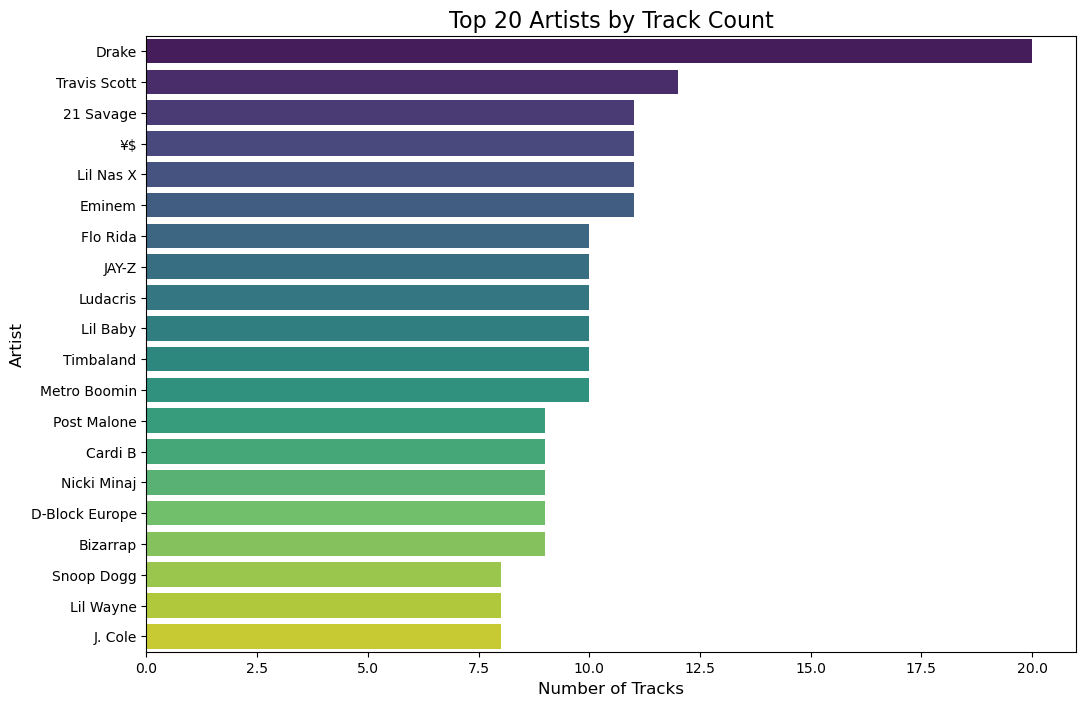

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tracks for each artist
artist_track_counts = spotify_data['Artist'].value_counts()

# Identify the artist with the highest number of tracks
top_artist = artist_track_counts.idxmax()
top_artist_count = artist_track_counts.max()

print(f"The artist with the highest number of tracks is '{top_artist}' with {top_artist_count} tracks.")

# Visualize the count of tracks for each artist using a countplot
plt.figure(figsize=(12, 8))

# Select top 20 artists for better visualization
top_artists = artist_track_counts.head(20)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')

plt.title('Top 20 Artists by Track Count', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.show()


Q5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [87]:
# Ensure 'spotify_data' is available for processing
spotify_data.head()

# Sort the dataset by popularity in ascending order to identify least popular tracks
least_popular_tracks = spotify_data.sort_values(by='Popularity', ascending=True)

# Drop duplicates to ensure unique tracks are considered
unique_least_popular_tracks = least_popular_tracks.drop_duplicates(subset=['Artist', 'Track Name'])

# Select the top 5 least popular unique tracks
top_5_least_popular = unique_least_popular_tracks[['Artist', 'Track Name', 'Popularity']].head(5)

# Display the result
top_5_least_popular


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
435,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


Q6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist

In [97]:
# Group by artist and calculate the average popularity
avg_popularity_by_artist = df.groupby('Artist')['Popularity'].mean().reset_index()

# Sort the artists by average popularity in descending order
top_artists = avg_popularity_by_artist.sort_values(by='Popularity', ascending=False).head(5)

# Print the top 5 most popular artists
print("\nTop 5 Most Popular Artists:")
print(top_artists)


Top 5 Most Popular Artists:
           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909


In [90]:
import pandas as pd
from tabulate import tabulate

# Calculate the average popularity for each artist
artist_avg_popularity = (
    spotify_data.groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Identify the artist with the highest average popularity
highest_avg_artist = artist_avg_popularity.iloc[0]

# Display the average popularity for each artist in a table format
print("Average Popularity of Top 5 Most Popular Artists:")
print(tabulate(artist_avg_popularity, headers=["Artist", "Average Popularity"], tablefmt="grid"))

# Highlight the artist with the highest average popularity
print("\nArtist with the Highest Average Popularity:")
highest_avg_artist_list = [[highest_avg_artist['Artist'], highest_avg_artist['Popularity']]]
print(tabulate(highest_avg_artist_list, headers=["Artist", "Average Popularity"], tablefmt="grid"))


Average Popularity of Top 5 Most Popular Artists:
+----+--------------+----------------------+
|    | Artist       |   Average Popularity |
+====+==============+======================+
|  0 | cassö        |              92      |
+----+--------------+----------------------+
|  1 | Trueno       |              89      |
+----+--------------+----------------------+
|  2 | David Guetta |              87      |
+----+--------------+----------------------+
|  3 | Travis Scott |              87      |
+----+--------------+----------------------+
|  4 | ¥$           |              86.0909 |
+----+--------------+----------------------+

Artist with the Highest Average Popularity:
+----------+----------------------+
| Artist   |   Average Popularity |
+==========+======================+
| cassö    |                   92 |
+----------+----------------------+


Q 7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist


In [99]:
df[df["Artist"].isin(["Drake","Eminem","¥$","21 Savage","Flo Rida"])]["Track Name"]# Initialize an empty list to store the results
most_popular_tracks = []

# Loop through the top 5 artists and find their most popular track
for artist in top_artists['Artist']:
    # Filter the DataFrame for the current artist
    artist_tracks = df[df['Artist'] == artist]

    # Find the most popular track for the current artist
    most_popular_track = artist_tracks.sort_values(by='Popularity', ascending=False).iloc[0]

    # Append the result to the list
    most_popular_tracks.append({
        'Artist': artist,
        'Track Name': most_popular_track['Track Name'],
        'Popularity': most_popular_track['Popularity']
    })

# Convert the list to a DataFrame
most_popular_tracks_df = pd.DataFrame(most_popular_tracks)

# Print the most popular tracks for the top 5 artists
print("\nMost Popular Tracks for the Top 5 Artists:")
print(most_popular_tracks_df)


Most Popular Tracks for the Top 5 Artists:
         Artist                    Track Name  Popularity
0         cassö                         Prada          92
1        Trueno  Mamichula - con Nicki Nicole          89
2  David Guetta            Baby Don't Hurt Me          87
3  Travis Scott    FE!N (feat. Playboi Carti)          93
4            ¥$                      CARNIVAL          96


Q8 Visualize relationships between multiple numerical variables simultaneously using a pair plot

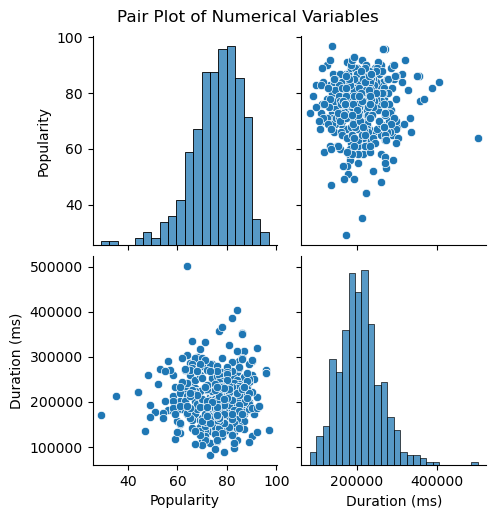

In [102]:
# Select numerical columns for the pair plot
numerical_columns = ['Popularity', 'Duration (ms)']

# Create the pair plot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

Q9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot

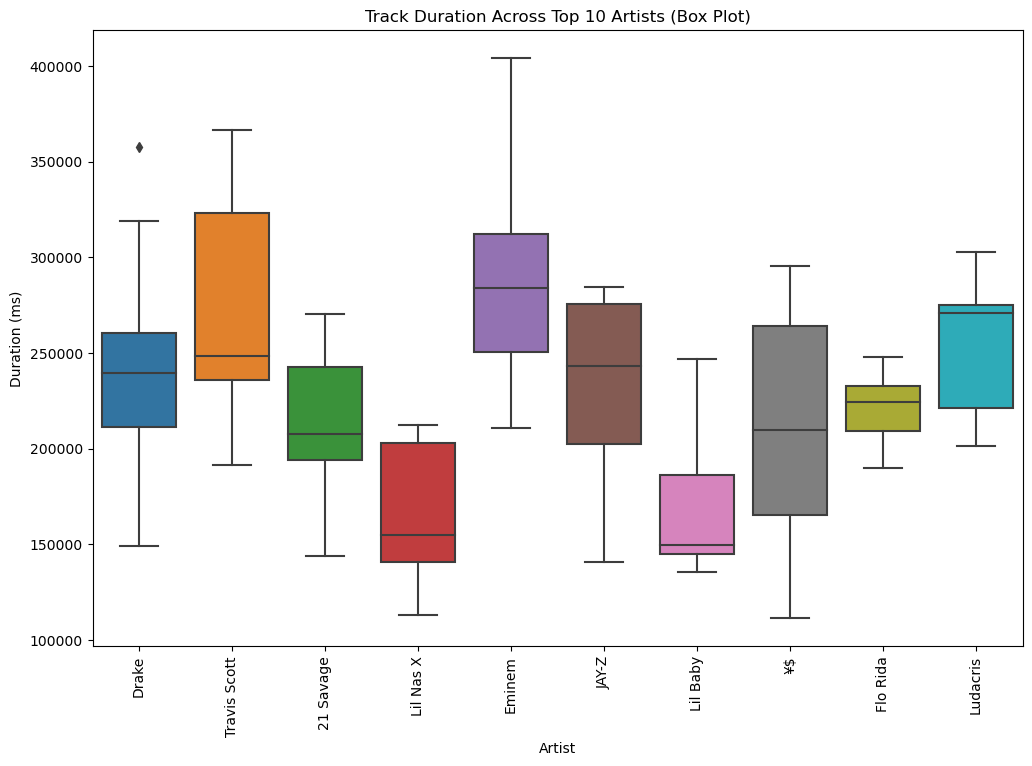

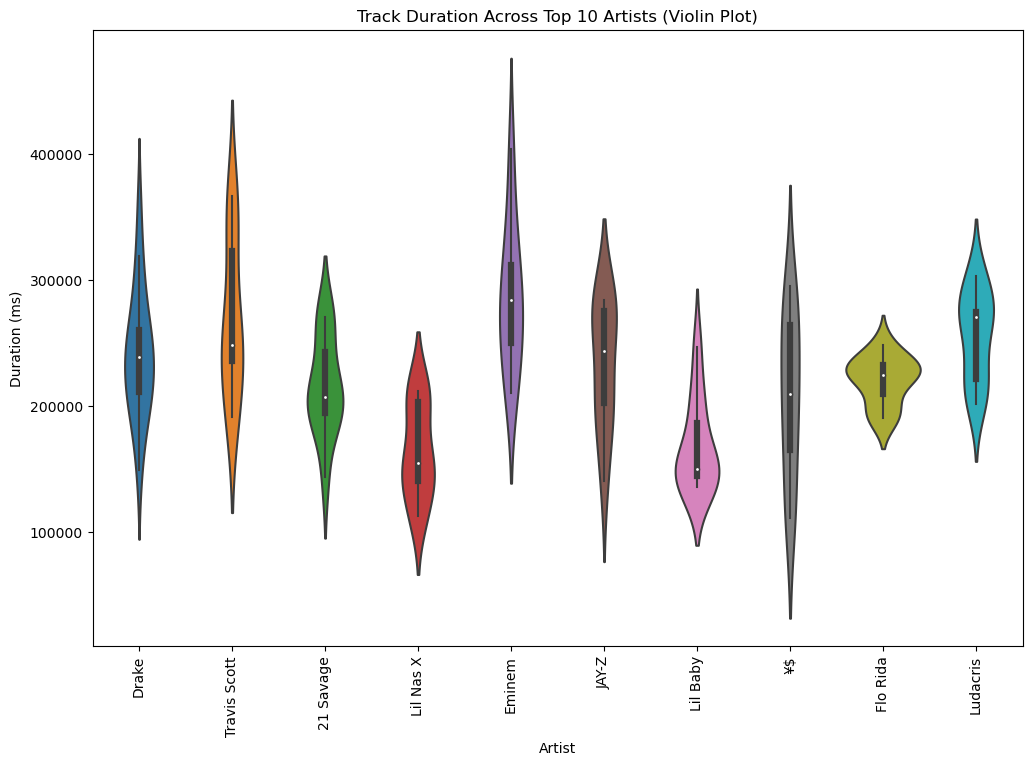

In [104]:
# Count the number of tracks for each artist
track_counts = df['Artist'].value_counts().reset_index()
track_counts.columns = ['Artist', 'Track Count']

# Get the top 10 artists
top_artists = track_counts.head(10)['Artist']

# Filter the DataFrame for the top 10 artists
df_top_artists = df[df['Artist'].isin(top_artists)]

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_top_artists)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Track Duration Across Top 10 Artists (Box Plot)')
plt.xticks(rotation=90)
plt.show()

# Plotting the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Duration (ms)', data=df_top_artists)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Track Duration Across Top 10 Artists (Violin Plot)')
plt.xticks(rotation=90)
plt.show()

Q10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

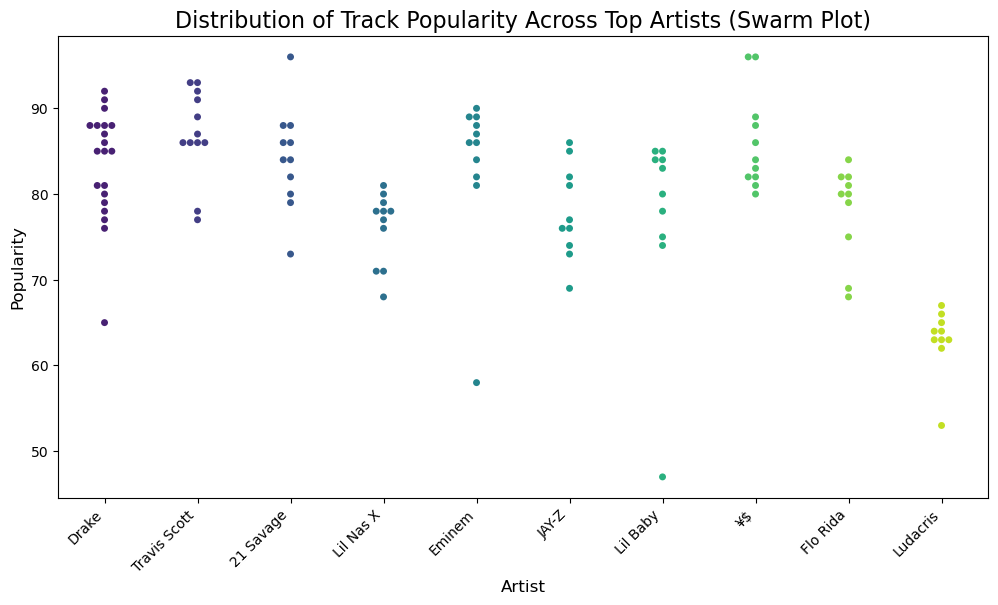

In [113]:

# Code for Swarm Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to include only the top 10 artists by track count
top_artists = spotify_data['Artist'].value_counts().head(10).index
filtered_data = spotify_data[spotify_data['Artist'].isin(top_artists)]

# Create a swarm plot for track popularity by artist
plt.figure(figsize=(12, 6))
sns.swarmplot(data=filtered_data, x='Artist', y='Popularity', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Track Popularity Across Top Artists (Swarm Plot)", fontsize=16)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.show()


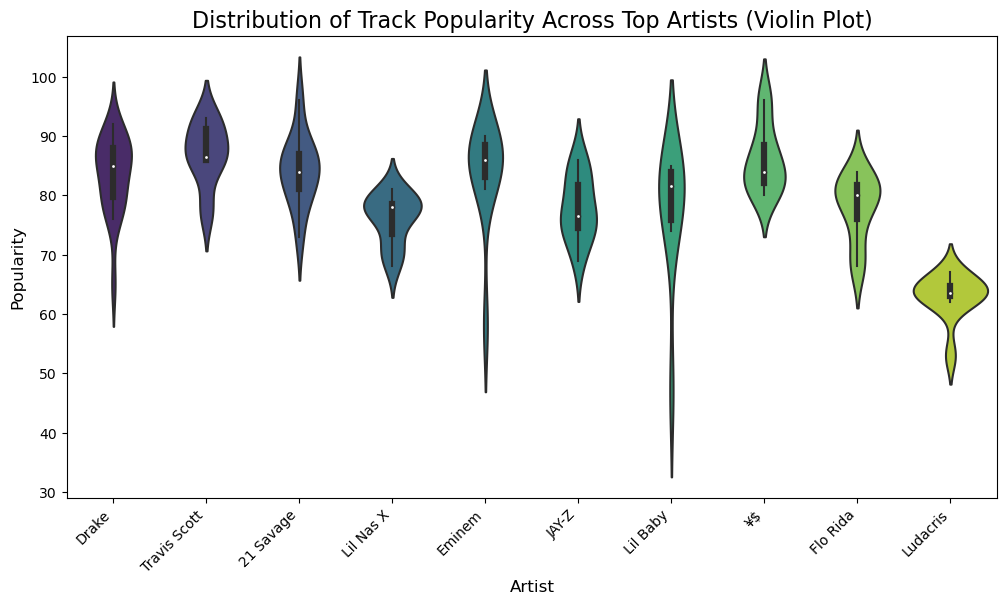

In [114]:

# Code for Violin Plot

# Create a violin plot for track popularity by artist
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_data, x='Artist', y='Popularity', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Track Popularity Across Top Artists (Violin Plot)", fontsize=16)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.show()

